In [1]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from ROOT import TFile, TTree
from array import array


def Landau(x,a, MP,xi):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    return  C1 * C3

def Landgauss(x,a, MP, xi, b,eps):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    C4 = C1 * C3
    C5 = b * np.exp(-x/eps)
    return  C4 + C5

In [2]:
## Configuración del estilo de las imágenes
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 0,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [3]:
# path = './dict_allclustes_NSAMP400_CONNIE_RUNID_116_Images_684_NSIGMAS_4_img1_KeV.pkl'
# path = './dict_allclustes_NSAMP400_CONNIE_RUNID_116_Images_684_NSIGMAS_5_img1SIZE_700x420_electrons.pkl'

# path = './dict_muons_NSAMP400_CONNIE_RUNID_116_Images_684_img1_Sol_0.7_Elip_0.65_electrons.pkl'
# path = './dict_muons_NSAMP400_CONNIE_RUNID_116_Images_684_img1_Sol_0.7_Elip_0.65_SIZE_700x420__electrons.pkl'
path = './dict_muons_NSAMP400_CONNIE_RUNID_116_Images_684_img1_Sol_0.65_Elip_0.65_SIZE_1022x420__electrons_new.pkl'

path_all = './dict_allclustes_NSAMP400_CONNIE_RUNID_116_Images_684_NSIGMAS_5_img1SIZE_1022x420_electrons.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

histogram_all = open(path_all, 'rb')
data_histogram_all = pck.load(histogram_all)
histogram_all.close()

In [4]:
#### Visualizar las keys del diccionario de muones ####
list_path = path.split('_')
print('Las unidades de los datos están en: ', data_histogram['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secuandarias por extensión: ', data_histogram['extension_1'].keys(), ' \n')
# print(type(data_histogram['extension_1']['all_events']))

#### Visualizar las keys del diccionario de all####
print('Las unidades de los datos están en: ', data_histogram_all['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram_all.keys())
print('Llaves secuandarias por extensión: ', data_histogram_all['extension_1'].keys())
# print(type(data_histogram['extension_1']['all_events']))

Las unidades de los datos están en:  1
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_Muons_Detected', 'Energy_Units', 'Elipcidad', 'Solidity', 'extension_1'])
Llaves secuandarias por extensión:  dict_keys(['charge', 'deltaEL', 'deltaL', 'all_events', 'theta', 'phi', 'elip', 'sol', 'all_events_elip', 'all_events_sol', 'datamasked'])  

Las unidades de los datos están en:  1
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_Muons_Detected', 'Energy_Units', 'extension_1'])
Llaves secuandarias por extensión:  dict_keys(['charge'])


In [5]:
data_muons_extension_1 = data_histogram['extension_1']
data_all_extension_1 = data_histogram_all['extension_1']

In [6]:
n_muons = data_histogram['All_Muons_Detected']
n_clusters = data_histogram_all['All_Muons_Detected']
print('Se detectaron ', n_muons, ' muones, y ', n_clusters, ' clusters en total')

Se detectaron  8821  muones, y  865257  clusters en total


## Espectro de Energía

In [7]:
list_data_muons_KeV = []
for element in data_muons_extension_1['charge']:
    data_KeV = element * 0.00368
    list_data_muons_KeV.append(data_KeV)

list_data_all_KeV = []
for element in data_all_extension_1['charge']:
    data_KeV = element * 0.00368
    list_data_all_KeV.append(data_KeV)
# list_data_KeV = data_muons_extension_1['charge']

### All clusters

/tmp/ipykernel_11656/1499071114.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


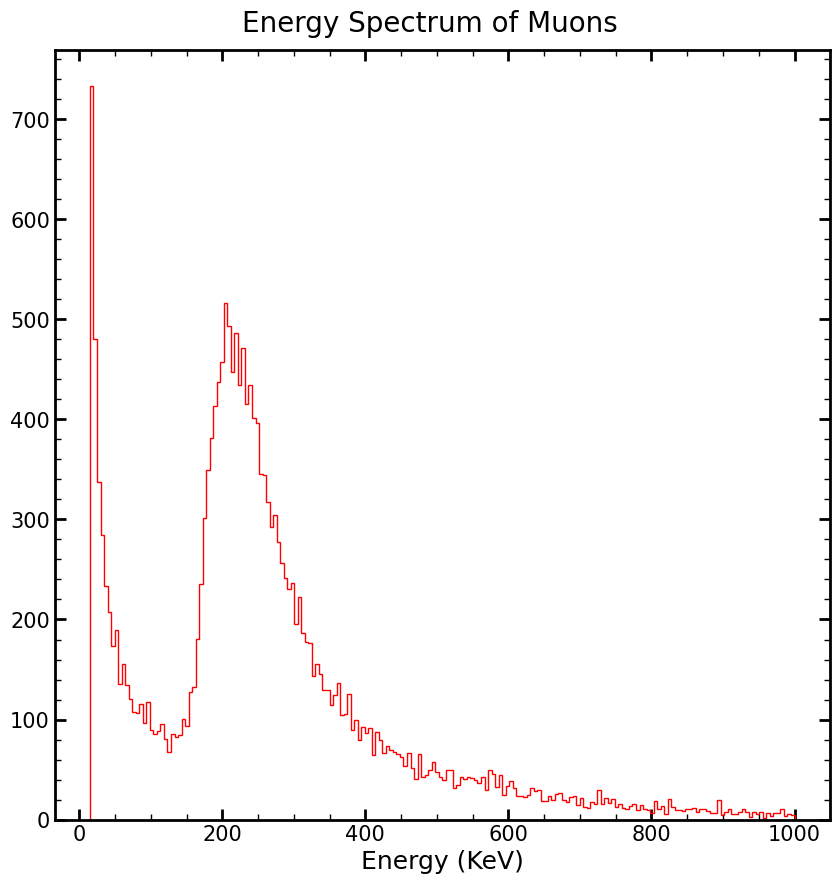

In [9]:
# print(np.max(data_muons_extension_4['charge']))

############################################
BINS = 200
# max_range = np.max(list_data_KeV)
max_range = 1000
#############################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

# axs.hist(data_muons_extension_1['all_events'] , bins = BINS, 
#             color = 'k', histtype = 'step', label = 'Background', range = (0, 10))
# axs.hist(data_muons_extension_1['charge'] , bins = BINS + 300, 
#             color = 'r',  histtype = 'step', range = (0, 220000))

axs.hist(list_data_all_KeV, bins = BINS, 
            color = 'r',  histtype = 'step', range = (15, max_range))

axs.legend()

## EScala Normal
# axs.set_ylim(0,800)
# axs.set_xlim(0,190000)

# # Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
# axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons', size = 20, y=0.92)
plt.show()

############################################

In [10]:
# N_Muons = array('f', [-9999])
Thet_Rad = array('f', [-9999])
Phi_Rad = array('f', [-9999])
# Energy_array = array('f', [-9999])
DeltaL_array = array('f', [-9999])
Energy_Landau_array = array('f', [-9999])


location_file = '../../Simulacion_ab_initio/'
file_root_name = 'Edep_all_CONNIE_NSAMP400_1022x420_SIGMAS_5_MeV.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

tree.Branch('edep', Energy_Landau_array, 'edep/F')

for i in np.arange(0, len(list_data_all_KeV)):
    Energy_Landau_array[0] = list_data_all_KeV[i] /1000
    DeltaL_array[0] = list_data_all_KeV[i]
    Phi_Rad[0] = list_data_all_KeV[i]
    Thet_Rad[0] = list_data_all_KeV[i]

    tree.Fill()

tree.Write()
file.Close()

In [11]:
hist_1, bins_edges_1 = np.histogram(list_data_all_KeV, bins=BINS, range = (150, max_range))

# print(bins_edges_1[np.argmax(hist_1)])
print('El pico está en : ', bins_edges_1[np.argmax(hist_1)], ' KeV')

El pico está en :  201.0  KeV


### Muons

/tmp/ipykernel_11656/1950748351.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


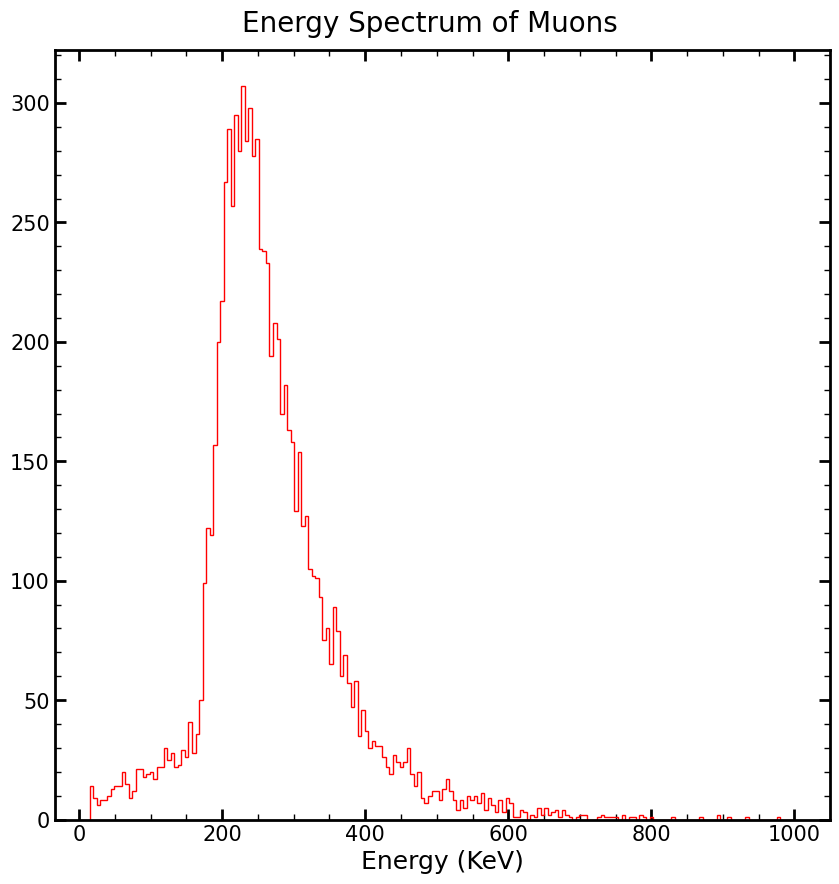

In [19]:
# print(np.max(data_muons_extension_4['charge']))

############################################
BINS = 200
# max_range = np.max(list_data_KeV)
max_range = 1000
#############################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

# axs.hist(data_muons_extension_1['all_events'] , bins = BINS, 
#             color = 'k', histtype = 'step', label = 'Background', range = (0, 10))
# axs.hist(data_muons_extension_1['charge'] , bins = BINS + 300, 
#             color = 'r',  histtype = 'step', range = (0, 220000))

axs.hist(list_data_muons_KeV, bins = BINS, 
            color = 'r',  histtype = 'step', range = (15, max_range))

axs.legend()

## EScala Normal
# axs.set_ylim(0,800)
# axs.set_xlim(0,190000)

# # Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
# axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons', size = 20, y=0.92)
plt.show()

############################################

In [ ]:
# N_Muons = array('f', [-9999])
Thet_Rad = array('f', [-9999])
Phi_Rad = array('f', [-9999])
Elip_array = array('f', [-9999])
Sol_array = array('f', [-9999])
DeltaL_array = array('f', [-9999])
Energy_Landau_array = array('f', [-9999])


location_file = '../../Simulacion_ab_initio/'
file_root_name = 'tree_muons_CONNIE_NSAMP400_1022x420_SIGMAS_5_MeV_new.root'
# file_root_name = 'Edep_muons_CONNIE_NSAMP400_700x420_SIGMAS_5_MeV.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

tree.Branch('l', DeltaL_array, 'l/F')
tree.Branch('edep', Energy_Landau_array, 'edep/F')
tree.Branch('thet', Thet_Rad, 'thet/F')
tree.Branch('phi', Phi_Rad, 'phi/F')
tree.Branch('elip', Elip_array, 'elip/F')
tree.Branch('sol', Sol_array, 'sol/F')

for i in np.arange(0, len(list_data_muons_KeV)):
    Energy_Landau_array[0] = list_data_muons_KeV[i] /1000
    DeltaL_array[0] = data_muons_extension_1['deltaL'][i]
    Phi_Rad[0] =  data_muons_extension_1['phi'][i]
    Thet_Rad[0] =  data_muons_extension_1['theta'][i]
    Elip_array[0] =  data_muons_extension_1['elip'][i]
    Sol_array[0] =  data_muons_extension_1['sol'][i]
    # print(DeltaL_array[0])

    tree.Fill()

tree.Write()
file.Close()


Elipall_array = array('f', [-9999])
Solall_array = array('f', [-9999])

location_file = '../../Simulacion_ab_initio/'
file_root_name = 'tree_nonmuons_CONNIE_NSAMP400_1022x420_SIGMAS_5_MeV.root'
# file_root_name = 'Edep_muons_CONNIE_NSAMP400_700x420_SIGMAS_5_MeV.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

tree.Branch('elip', Elipall_array, 'elip/F')
tree.Branch('sol', Solall_array, 'sol/F')

for i in np.arange(0, len( data_muons_extension_1['all_events_elip'])):
    Elipall_array[0] =  data_muons_extension_1['all_events_elip'][i]
    Solall_array[0] =  data_muons_extension_1['all_events_sol'][i]
    # print(DeltaL_array[0])

    tree.Fill()

tree.Write()
file.Close()




In [20]:
# BINS = 300

hist_1, bins_edges_1 = np.histogram(list_data_muons_KeV, bins=BINS, range = (150, max_range))

# print(bins_edges_1[np.argmax(hist_1)])
print('El pico está en : ', bins_edges_1[np.argmax(hist_1)], ' KeV')

El pico está en :  235.0  KeV


## Espectro de distancias

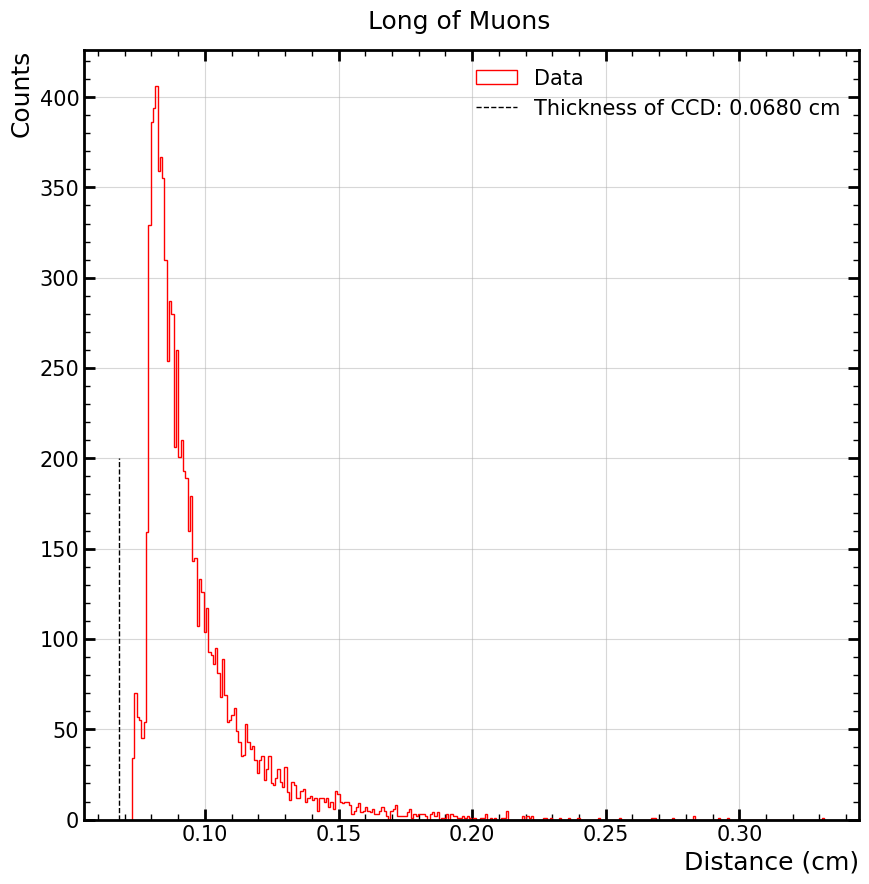

In [17]:
fig, axs = plt.subplots(figsize = [10,10])
BINS = 300
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
# axs.hist(data_muons_extension_1['deltaL'] + data_muons_extension_2['deltaL'] + data_muons_extension_4['deltaL'], bins=BINS, color = 'k',
#         label = 'All Extensions', histtype = 'step')

axs.hist(data_muons_extension_1['deltaL'], bins = BINS, #range= (np.min(data_muons_extension_1['deltaL']), np.max(data_muons_extension_1['deltaL'])), 
            color = 'r', label= 'Data', histtype = 'step')

# axs.hist(data_muons_extension_2['deltaL'], bins = BINS, range= (np.min(data_muons_extension_2['deltaL']), np.max(data_muons_extension_2['deltaL'])), 
#             color = 'g', label= 'Extension 2', histtype = 'step')

# axs.hist(data_muons_extension_4['deltaL'], bins = BINS, range= (np.min(data_muons_extension_4['deltaL']), np.max(data_muons_extension_4['deltaL'])), 
#             color = 'b', label= 'Extension 4', histtype = 'step')
            
axs.vlines(x=0.0680, ymax=200, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0680 cm')

axs.legend()
axs.grid()

# axs.set_xlim(0.065,0.2)
axs.set_xlabel('Distance (cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Long of Muons', size = 18, y=0.92)
plt.show()

## Espectro de Ángulos Theta

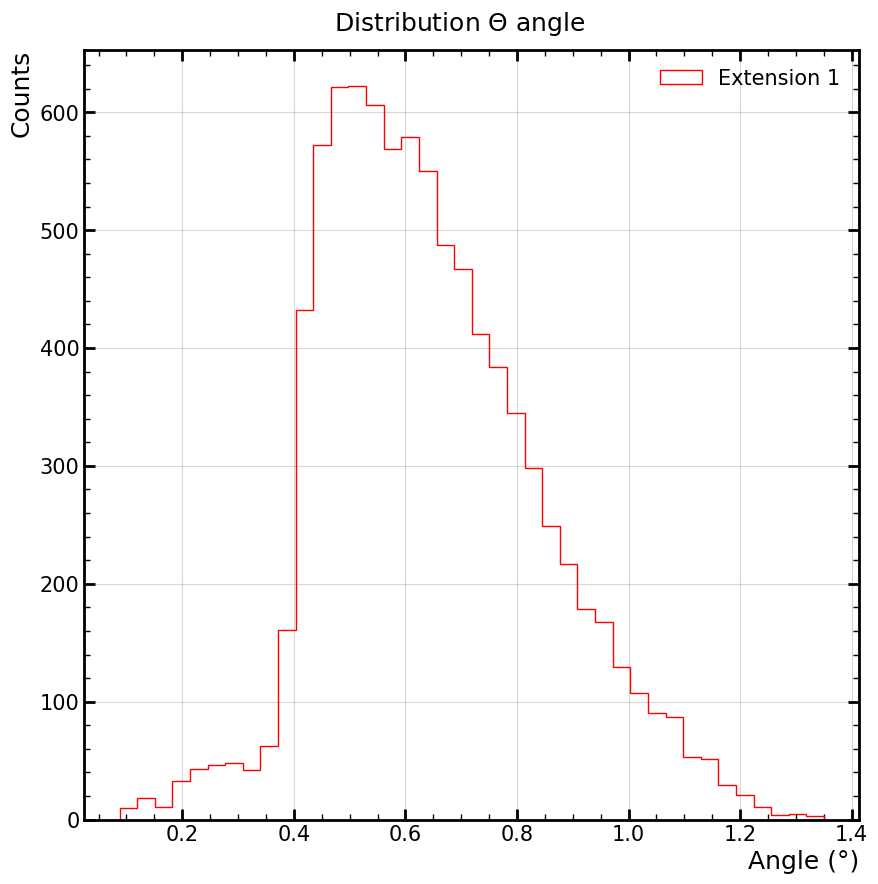

In [23]:
fig, axs = plt.subplots(figsize = [10,10])
BINS = 40

# axs.hist(data_muons_extension_1['theta'] + data_muons_extension_2['theta'] + data_muons_extension_4['theta'], bins=BINS, color = 'k',
#         label = 'All Extensions', histtype = 'step')

axs.hist(data_muons_extension_1['theta'], bins = BINS, range= (np.min(data_muons_extension_1['theta']), np.max(data_muons_extension_1['theta'])), 
            color = 'r', label= 'Extension 1', histtype = 'step')

# axs.hist(data_muons_extension_2['theta'], bins = BINS, range= (np.min(data_muons_extension_2['theta']), np.max(data_muons_extension_2['theta'])), 
#             color = 'g', label= 'Extension 2', histtype = 'step')

# axs.hist(data_muons_extension_4['theta'], bins = BINS, range= (np.min(data_muons_extension_4['theta']), np.max(data_muons_extension_4['theta'])), 
#             color = 'b', label= 'Extension 4', histtype = 'step')
            
# axs.vlines(x=0.0725, ymax=2500, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0725 cm')
axs.legend()
axs.grid()

# axs.set_xlim(0.065,0.2)
axs.set_xlabel('Angle (°)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle(r'Distribution $\Theta$ angle', size = 18, y=0.92)
plt.show()

## Espectro de Ángulos Phi

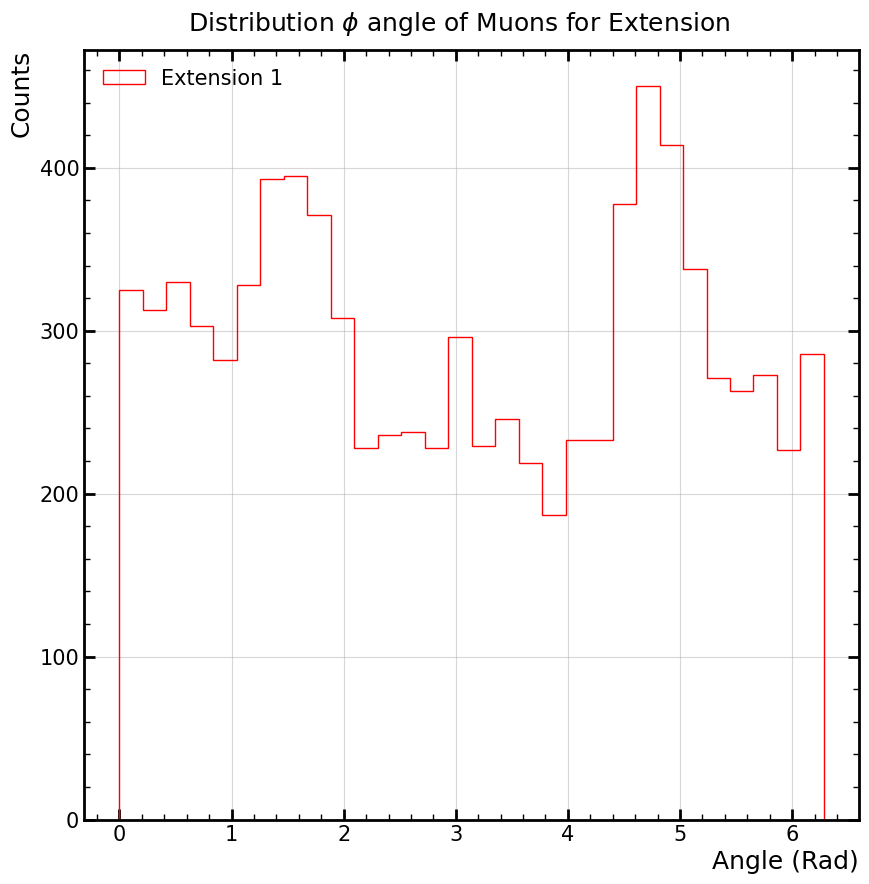

In [16]:
fig, axs = plt.subplots(figsize = [10,10])
BINS = 30

# axs.hist(data_muons_extension_1['phi'] + data_muons_extension_2['phi'] + data_muons_extension_4['phi'], bins=BINS, color = 'k',
#         label = 'All Extensions', histtype = 'step')

# axs.hist(data_muons_extension_1['phi'], bins = BINS, range= (-5, np.max(data_muons_extension_1['phi'])), 
#             color = 'r', label= 'Extension 1', histtype = 'step')

axs.hist(data_muons_extension_1['phi'], bins = BINS, range= (0, 2* np.pi), 
            color = 'r', label= 'Extension 1', histtype = 'step')
            
# axs.vlines(x=0.0725, ymax=2500, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0725 cm')
axs.legend()
axs.grid()

# axs.set_xlim(0)
axs.set_xlabel('Angle (Rad)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle(r'Distribution $\phi$ angle of Muons for Extension', size = 18, y=0.92)
plt.show()